# Funkcje sklejane

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Bartosz Kucharz

# Funkcja zadana do analizy

$$k=3\\\\
m=0.2\\\\
f(x)=\sin\left(\frac{xk}{\pi}\right)e^{\frac{-mx}{\pi}}
$$

In [2]:
def f8(x):
    k=3
    m=0.2
    return np.sin(x*k/np.pi)*np.exp(-m*x/np.pi)

In [3]:
def get_nodes(function, n, nodes_func):
    x = nodes_func(-np.pi*np.pi, 2*np.pi*np.pi, n)
    y = np.vectorize(f8)(x)
    return x, y

def  uniform_nodes(a, b, n):
    return np.linspace(a, b, n)

# Sześcienna funkcja sklejana

In [4]:
def spline3(x, y, n, boundary_condition='free boundary'):
    h = x[1:] - x[:-1]
    matrix = np.zeros((x.shape[0], x.shape[0]))
    for i in range(x.shape[0]-2):
        matrix[i+1][i:i+3] = np.array([h[i], 2*(h[i]+h[i+1]), h[i+1]])
    
    delta = (y[1:] - y[:-1])/h
    free = np.zeros((x.shape[0]))
    free[1:-1] = delta[1:] - delta[:-1]
    free = free.reshape((-1))
    
    if boundary_condition == 'free boundary':
        matrix[0][0] = 6
        matrix[-1][-1] = 6
    elif boundary_condition== 'clamped boundary':
        d = 1e-6
        s_1 = (f8(x[0]+d) - y[0])/(d)
        matrix[0][:2] = np.array([-2*h[0], -h[0]])
        free[0] = s_1 - (y[1] - y[0])/h[0]
        
        s_1 = (y[-1] - f8(x[-1]-d))/(d)
        matrix[-1][-2:] = np.array([h[-2], 2*h[-2]])
        free[-1] = s_1 - (y[-1] - y[-2])/h[-2]
    else:
        raise ValueError("Wrong boundary condition")
        return

    
    result = np.linalg.solve(matrix, free)
    s_2 = 6*result
    
    
    C = y[1:]/h - s_2[1:]*h/6
    D = y[:-1]/h - s_2[:-1]*h/6
    
    def s(nx):
        s = s_2[i]/(6*h[i])*np.power(x[i+1] - nx, 3)
        s += s_2[i+1]/(6*h[i])*np.power(nx-x[i], 3)
        s += C[i]*(nx-x[i]) + D[i]*(x[i+1] - nx)
        return s
    
    new_x = np.linspace(x[0], x[-1], n)
    new_y = np.empty(new_x.shape)
    
                
    for i in range(x.shape[0]-1):
        mask = ((new_x >= x[i]) & (new_x <= x[i+1]))
        new_y[mask] = np.vectorize(s)(new_x[mask])
        
    return new_x, new_y

# Kwadratowa funkcja sklejana

In [20]:
def spline2(x, y, n, boundary_condition):
    matrix = np.zeros((x.shape[0], x.shape[0]))
    free = np.empty((x.shape[0]))
    
    np.fill_diagonal(matrix, 1)
    np.fill_diagonal(matrix[:-1, 1:], 1)
    
    h = (x[1:] - x[:-1])
    
    free[:-1] = 2*(y[1:]-y[:-1])/h
    
    matrix[-1,:].fill(0)
    if boundary_condition == 'free boundary':        
        matrix[-1][0] = 1
        free[-1] = (y[1]-y[0])/h[0]
    elif boundary_condition== 'clamped boundary':
        d = 1e-6
        s_1 = (f8(x[0]+d) - y[0])/(d)
        matrix[-1][0] = 1
        free[-1] = s_1 
    else:
        raise ValueError("Wrong boundary condition")
        return
        
    m = np.linalg.solve(matrix, free)
    
    C = y[:-1] + m[:-1]*h/2

    def s(nx):
        s = -m[i]*np.power(x[i+1] - nx, 2)/(2*h[i]) + m[i+1]*np.power(nx - x[i], 2)/(2*h[i]) + C[i]
        return s
    
    new_x = np.linspace(x[0], x[-1], n)
    new_y = np.empty(new_x.shape)
    
                
    for i in range(x.shape[0]-1):
        mask = ((new_x >= x[i]) & (new_x <= x[i+1]))
        new_y[mask] = np.vectorize(s)(new_x[mask])
                
    return new_x, new_y  

# Wykres funkcji do analizy

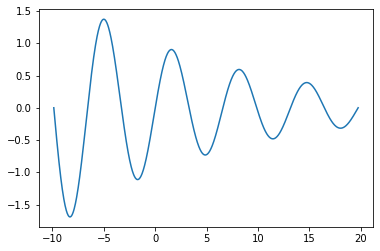

In [22]:
X, Y = get_nodes(f8, 1000, uniform_nodes)
plt.plot(X, Y)

# Wyniki interpolacji funkcją sklejana 3-ego stopnia

## Warunek brzegowy: free boundary
$$s''(x_1) = s''(x_n) = 0$$


### Liczba węzłów: 5

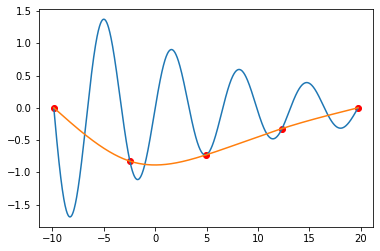

In [27]:
plt.plot(X, Y)
x, y = get_nodes(f8, 5, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 7

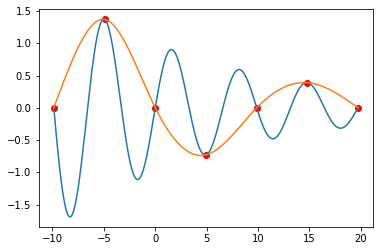

In [30]:
plt.plot(X, Y)
x, y = get_nodes(f8, 7, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 9

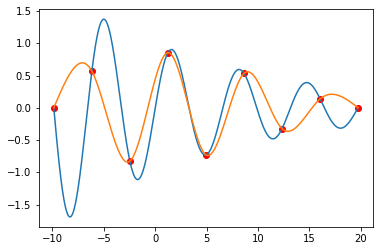

In [60]:
plt.plot(X, Y)
x, y = get_nodes(f8, 9, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 12

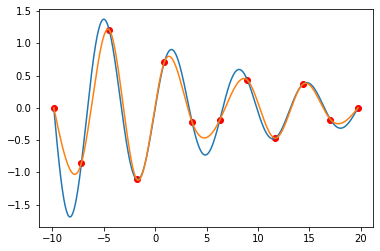

In [38]:
plt.plot(X, Y)
x, y = get_nodes(f8, 12, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 15

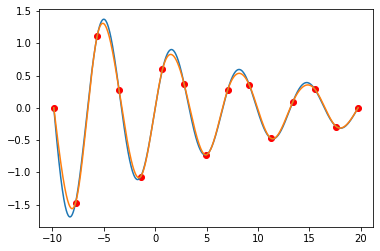

In [40]:
plt.plot(X, Y)
x, y = get_nodes(f8, 15, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 18

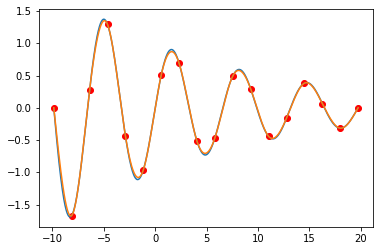

In [48]:
plt.plot(X, Y)
x, y = get_nodes(f8, 18, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

## Warunek brzegowy: clamped boundary
$$s'(x_1) = f'_1\\s'(x_n)= f'_n$$
W punktach brzegowych pochodne funckji sklejanej są równe pochodnym funkcji interpolowanej. Oznacza to że w tych punktach funkcja interpolująca i interpolowana są do siebie styczne.

### Liczba węzłów: 5

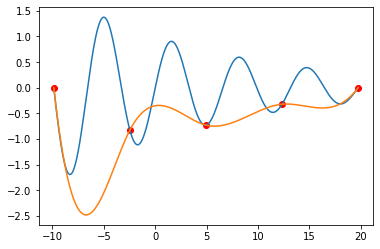

In [50]:
plt.plot(X, Y)
x, y = get_nodes(f8, 5, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 7

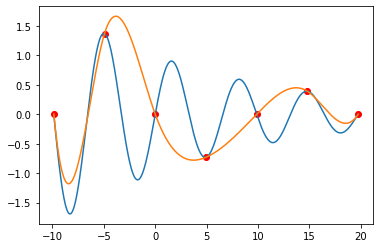

In [51]:
plt.plot(X, Y)
x, y = get_nodes(f8, 7, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 9

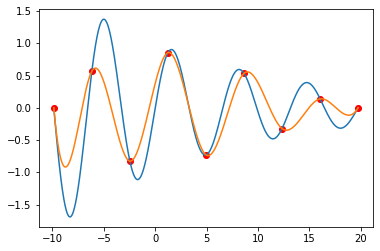

In [59]:
plt.plot(X, Y)
x, y = get_nodes(f8, 9, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 12

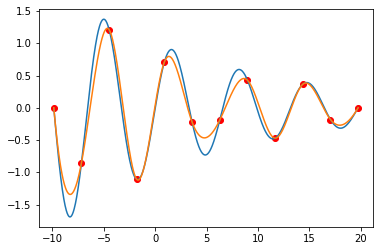

In [57]:
plt.plot(X, Y)
x, y = get_nodes(f8, 12, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 15

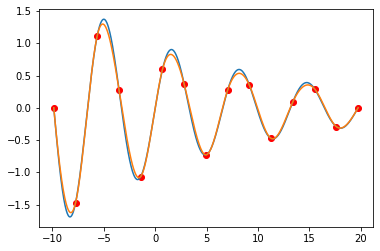

In [53]:
plt.plot(X, Y)
x, y = get_nodes(f8, 15, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 18

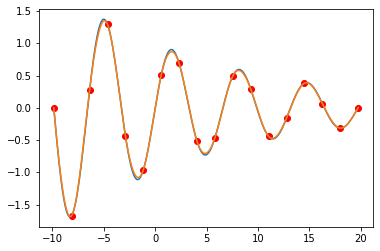

In [54]:
plt.plot(X, Y)
x, y = get_nodes(f8, 18, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline3(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

# Wyniki interpolacji funkcją sklejana 2-ego stopnia

## Warunek brzegowy:
$$s'(x_1) = 0$$
Za pierszy spline przyjmujemy funkcje liniową.

### Liczba węzłów: 5

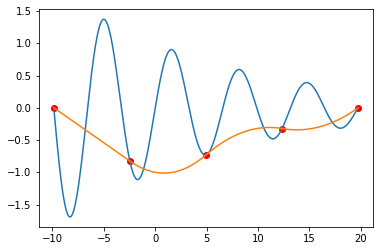

In [62]:
plt.plot(X, Y)
x, y = get_nodes(f8, 5, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 7

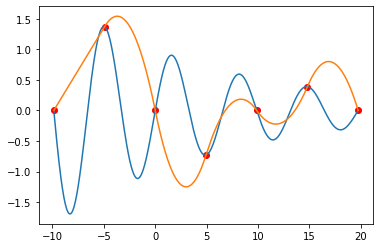

In [64]:
plt.plot(X, Y)
x, y = get_nodes(f8, 7, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 9

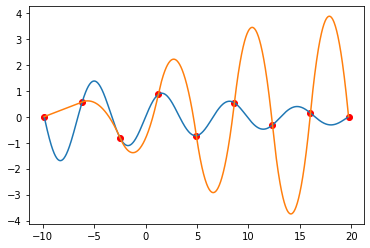

In [65]:
plt.plot(X, Y)
x, y = get_nodes(f8, 9, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 12

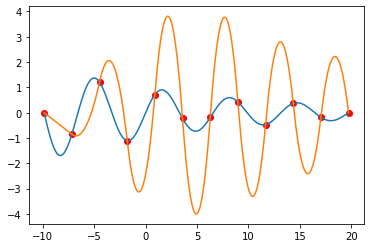

In [66]:
plt.plot(X, Y)
x, y = get_nodes(f8, 12, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 15

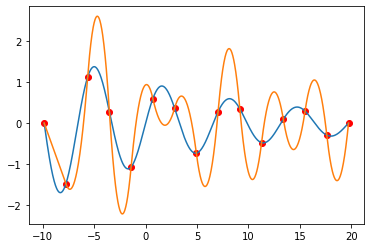

In [67]:
plt.plot(X, Y)
x, y = get_nodes(f8, 15, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 18

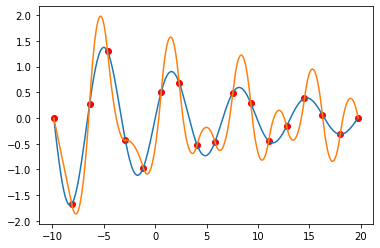

In [88]:
plt.plot(X, Y)
x, y = get_nodes(f8, 18, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

### Liczba węzłów: 25

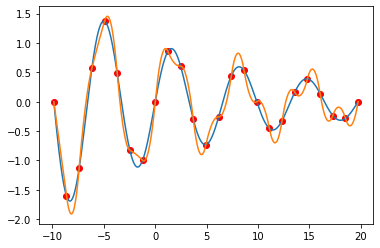

In [91]:
plt.plot(X, Y)
x, y = get_nodes(f8, 25, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'free boundary')
plt.plot(nx, ny)

## Warunek brzegowy: clamped boundary
$$s'(x_1) = f'_1$$
W pierszym węźle funkcja interpolująca i interpolowana są do siebie styczne.

### Liczba węzłów: 5

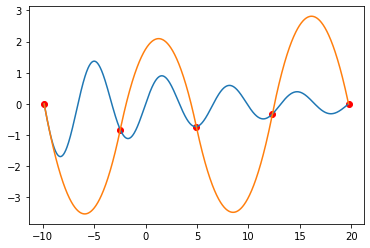

In [72]:
plt.plot(X, Y)
x, y = get_nodes(f8, 5, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 7

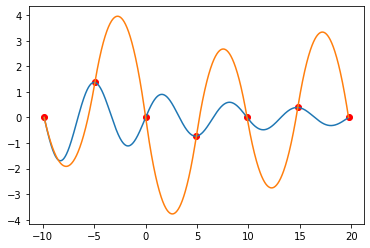

In [73]:
plt.plot(X, Y)
x, y = get_nodes(f8, 7, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 9

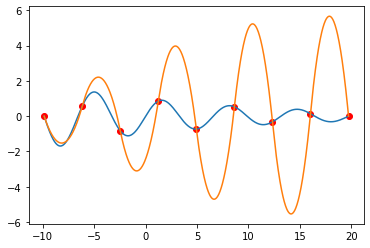

In [74]:
plt.plot(X, Y)
x, y = get_nodes(f8, 9, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 12

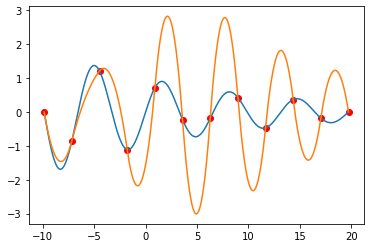

In [75]:
plt.plot(X, Y)
x, y = get_nodes(f8, 12, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 15

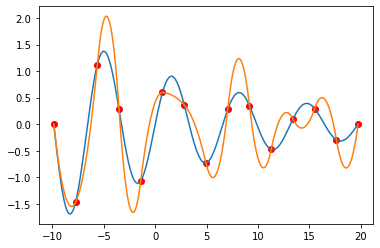

In [76]:
plt.plot(X, Y)
x, y = get_nodes(f8, 15, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 18

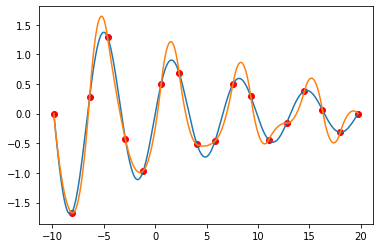

In [82]:
plt.plot(X, Y)
x, y = get_nodes(f8, 18, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

### Liczba węzłów: 25

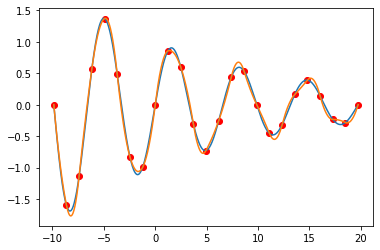

In [87]:
plt.plot(X, Y)
x, y = get_nodes(f8, 25, uniform_nodes)
plt.scatter(x, y, c='r')

nx, ny = spline2(x, y, 1000, 'clamped boundary')
plt.plot(nx, ny)

# Różnice w interpolacjach

## Ze względu na warunek brzegowy

Text(0.5, 1.0, 'clamped boundary')

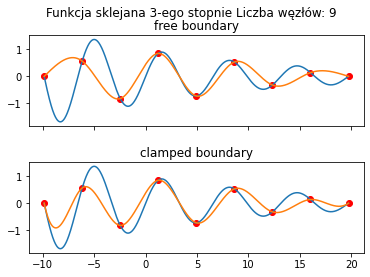

In [119]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0.4, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.plot(X, Y)
ax2.plot(X, Y)
x, y = get_nodes(f8, 9, uniform_nodes)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
nx, ny = spline3(x, y, 1000, 'free boundary')
ax1.plot(nx, ny)
nx, ny = spline3(x, y, 1000, 'clamped boundary')
ax2.plot(nx, ny)
fig.suptitle("Funkcja sklejana 3-ego stopnie Liczba węzłów: 9")
ax1.set_title("free boundary")
ax2.set_title("clamped boundary")

Text(0.5, 1.0, 'clamped boundary')

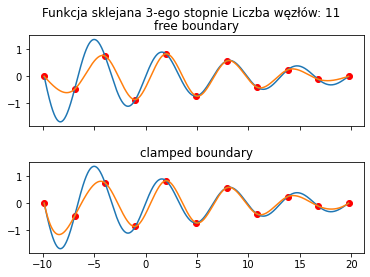

In [122]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0.4, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.plot(X, Y)
ax2.plot(X, Y)
x, y = get_nodes(f8, 11, uniform_nodes)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
nx, ny = spline3(x, y, 1000, 'free boundary')
ax1.plot(nx, ny)
nx, ny = spline3(x, y, 1000, 'clamped boundary')
ax2.plot(nx, ny)
fig.suptitle("Funkcja sklejana 3-ego stopnie Liczba węzłów: 11")
ax1.set_title("free boundary")
ax2.set_title("clamped boundary")

W powyższych przykładach można zauważyć, że wybór warunku brzegowego "clamped boundary" wpłynął pozytywnie na dokładność interpolacji na brzegach funkcji.

## Ze względu na stopień funkcji sklejanej

Text(0.5, 1.0, 'Funkcja 3-ego stopnia')

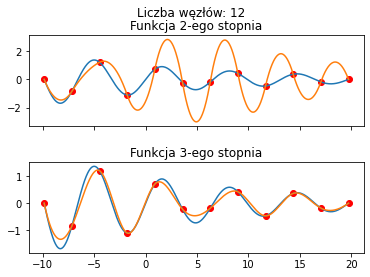

In [146]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0.4, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.plot(X, Y)
ax2.plot(X, Y)
x, y = get_nodes(f8, 12, uniform_nodes)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
nx, ny = spline2(x, y, 1000, 'clamped boundary')
ax1.plot(nx, ny)
nx, ny = spline3(x, y, 1000, 'clamped boundary')
ax2.plot(nx, ny)
fig.suptitle("Liczba węzłów: 12")
ax1.set_title("Funkcja 2-ego stopnia")
ax2.set_title("Funkcja 3-ego stopnia")

Text(0.5, 1.0, 'Funkcja 3-ego stopnia')

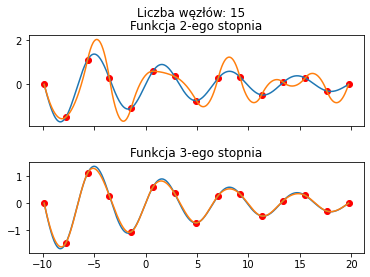

In [147]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0.4, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.plot(X, Y)
ax2.plot(X, Y)
x, y = get_nodes(f8, 15, uniform_nodes)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
nx, ny = spline2(x, y, 1000, 'clamped boundary')
ax1.plot(nx, ny)
nx, ny = spline3(x, y, 1000, 'clamped boundary')
ax2.plot(nx, ny)
fig.suptitle("Liczba węzłów: 15")
ax1.set_title("Funkcja 2-ego stopnia")
ax2.set_title("Funkcja 3-ego stopnia")

Text(0.5, 1.0, 'Funkcja 3-ego stopnia')

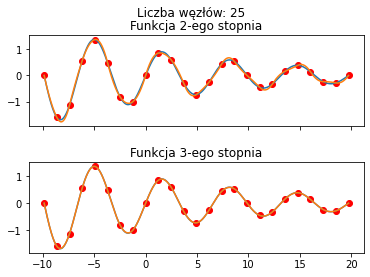

In [162]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0.4, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.plot(X, Y)
ax2.plot(X, Y)
x, y = get_nodes(f8, 25, uniform_nodes)
ax1.scatter(x, y, c='r')
ax2.scatter(x, y, c='r')
nx, ny = spline2(x, y, 1000, 'clamped boundary')
ax1.plot(nx, ny)
nx, ny = spline3(x, y, 1000, 'clamped boundary')
ax2.plot(nx, ny)
fig.suptitle("Liczba węzłów: 25")
ax1.set_title("Funkcja 2-ego stopnia")
ax2.set_title("Funkcja 3-ego stopnia")

W powyższych przykładach można zauważyć, że interpolacja funkcją sklejaną 3-ego stopnia jest dokładniejsza od funkcji 2-ego stopnia. Spline 3-ego stopnia całkiem dokładnie zinterpolował zadaną funkcję już dla 15 węzłów. Natomiast interpolując funkcją 2-ego stopnia podobną dokładność otrzymano dopiero dla 25 węzłów.